In [330]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter

In [331]:
#Datasets
costs = pd.read_csv('../data/costs_us.csv')
orders = pd.read_csv('../data/orders_log_us.csv')
visits = pd.read_csv('../data/visits_log_us.csv')

In [332]:
# --- IGNORE ---
print(costs.info())
print(costs.head())
print(orders.info())
print(orders.head())
print(visits.info())
print(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
                Buy Ts  Revenue                   Uid
0  2017-06-01 

In [333]:
#Optimización de datos
costs['dt'] = pd.to_datetime(costs['dt'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

## Visitas
¿Cuántas personas lo usan cada día, semana y mes? <br>
¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión). <br>
¿Cuál es la duración de cada sesión? <br>
¿Con qué frecuencia los usuarios regresan? <br>

In [334]:
#Reporte visitas
Daily_visits = visits.groupby(visits['Start Ts'].dt.date)['Uid'].nunique().reset_index()
Daily_visits.rename(columns={'Start Ts': 'Fecha', 'Uid': 'Visitas'}, inplace=True)
Daily_visits['Fecha'] = pd.to_datetime(Daily_visits['Fecha'])

Daily_visits['dia'] = Daily_visits['Fecha'].dt.day
Daily_visits['dia_semana'] = Daily_visits['Fecha'].dt.day_name()
Daily_visits['semana'] = Daily_visits['Fecha'].dt.isocalendar().week
Daily_visits['mes'] = Daily_visits['Fecha'].dt.month
Daily_visits['año'] = Daily_visits['Fecha'].dt.year

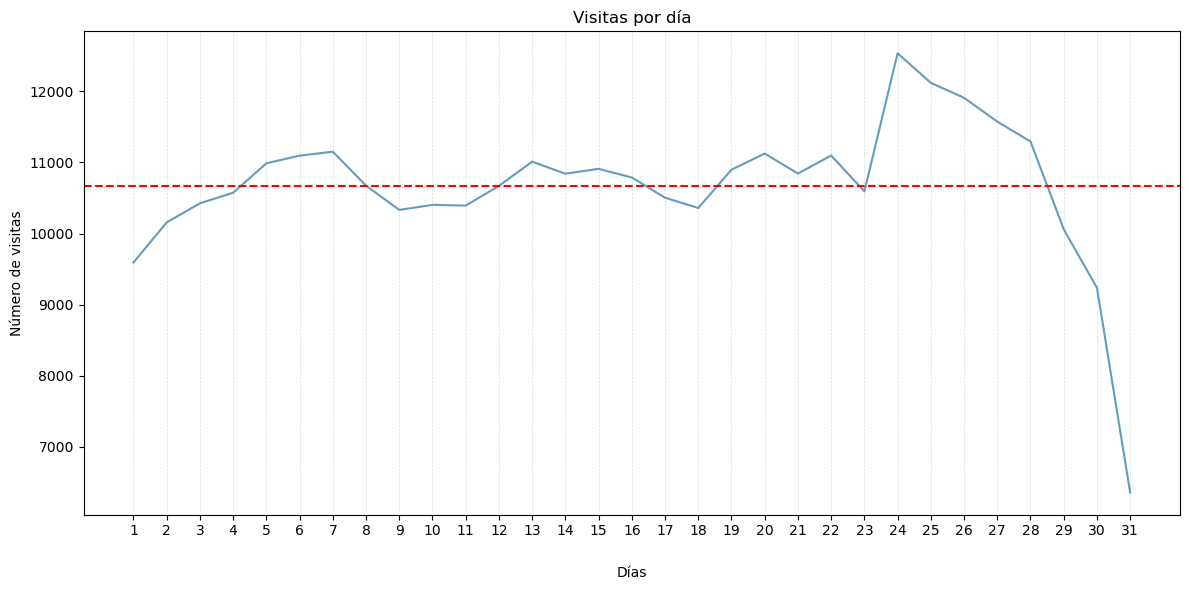

Valor medio de visitas: 10661.58
Días con visitas por encima de la media: [5, 6, 7, 8, 12, 13, 14, 15, 16, 19, 20, 21, 22, 24, 25, 26, 27, 28]


In [335]:
#Reporte de visitas x dia del mes
visits_per_day = Daily_visits.groupby('dia')['Visitas'].sum().reset_index()
mean_visits = visits_per_day['Visitas'].mean()
days_over_mean = visits_per_day[visits_per_day['Visitas'] > mean_visits]['dia']

#Visualización de visitas por día del mes
plt.figure(figsize=(12, 6))
sns.lineplot(data=visits_per_day, x='dia', y='Visitas', color='#669bbc')
for x in range(1, 32):
    plt.axvline(x=x, color='grey', linestyle='--', linewidth=0.5, alpha=0.3)

plt.axhline(y= mean_visits, color='red', linestyle='--', linewidth=1.5, label='Límite de visitas')
plt.title('Visitas por día')
plt.xlabel('Días', labelpad=20)
plt.ylabel('Número de visitas')
plt.xticks(ticks=range(1, 32))
plt.tight_layout()
plt.show()

#resultados
print("Valor medio de visitas:", mean_visits.round(2))
print("Días con visitas por encima de la media:", days_over_mean.tolist())

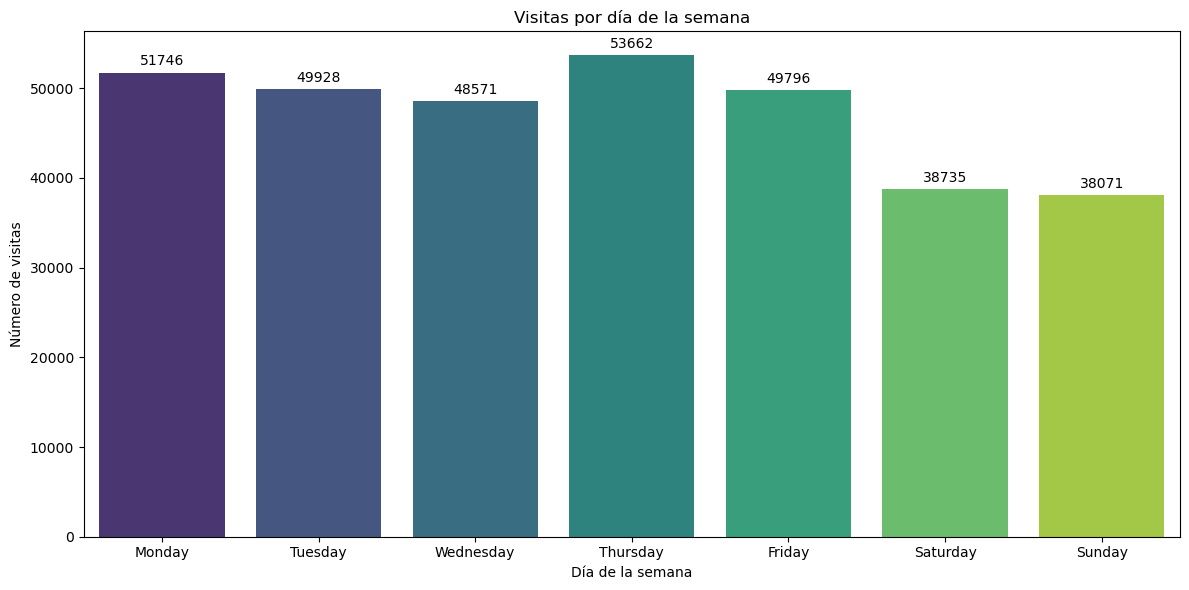

In [336]:
#Reporte de visitas x dia de la semana
visits_per_weekday = Daily_visits.groupby('dia_semana')['Visitas'].sum().reset_index()

# Ordenar los días de la semana
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
visits_per_weekday['dia_semana'] = pd.Categorical(
    visits_per_weekday['dia_semana'],
    categories=orden_dias,
    ordered=True
)
visits_per_weekday = visits_per_weekday.sort_values('dia_semana')

#Visualización de visitas por día de la semana
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(
    data=visits_per_weekday, 
    x='dia_semana', 
    y='Visitas', 
    palette='viridis', 
    ax=ax, 
    hue='dia_semana'
)
for container in bars.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

ax.set_title('Visitas por día de la semana')
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Número de visitas')
plt.tight_layout()
plt.show()

Con esto determinamos que el dia de la semana mas visitado es el dia 'Jueves' y los dias con mesno visitas son el fin de semana

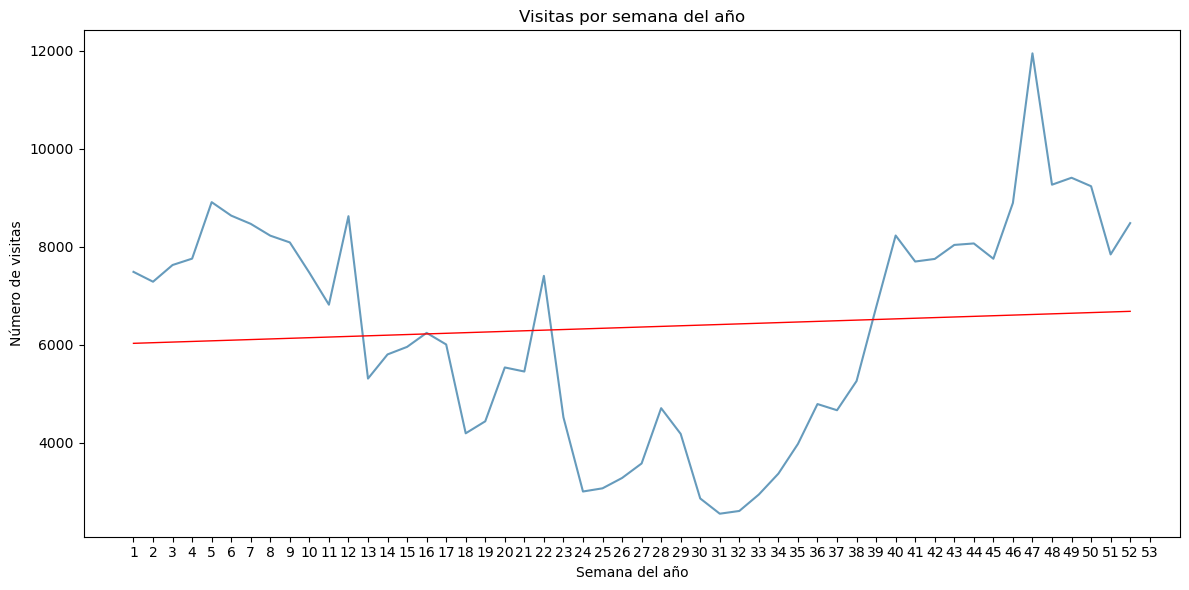

In [337]:
#Reporte de visitas x semana del año
visits_per_week = Daily_visits.groupby('semana')['Visitas'].sum().reset_index()

#Visualización de visitas por semana del año
plt.figure(figsize=(12, 6))
sns.lineplot(data=visits_per_week, x='semana', y='Visitas', color='#669bbc')

# Línea de tendencia lineal
x = visits_per_week['semana']
y = visits_per_week['Visitas']
coef = np.polyfit(x, y, 1)
poly = np.poly1d(coef)
plt.plot(x, poly(x), color='red', linestyle='-', linewidth=1, label='Tendencia lineal')


plt.title('Visitas por semana del año')
plt.xlabel('Semana del año')
plt.ylabel('Número de visitas')
plt.xticks(ticks=range(1, 54))
plt.tight_layout()
plt.show()

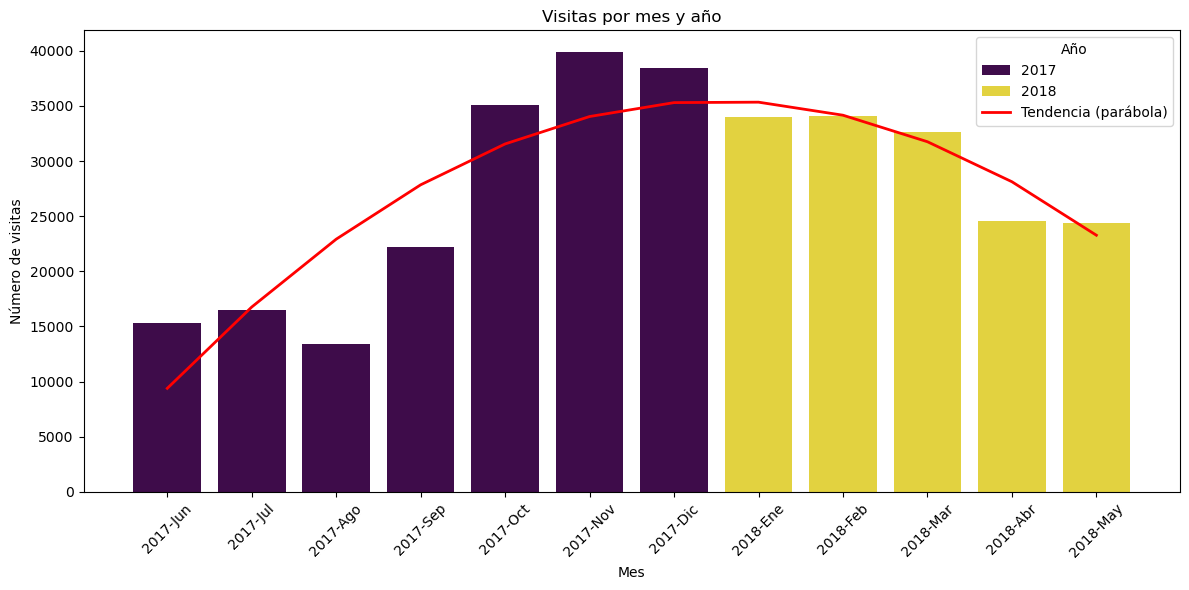

el valor de la tendencia polinómica es: [-611.41 7988.04 9389.24]


In [338]:
#Reporte de meses x año
visits_per_month = Daily_visits.groupby(['año', 'mes'])['Visitas'].sum().reset_index()

# Ordenar los meses del año
nombres_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
visits_per_month = visits_per_month.sort_values(['año', 'mes'])
visits_per_month['año_mes'] = visits_per_month['año'].astype(str) + '-' + visits_per_month['mes'].astype(str).str.zfill(2)

# Etiquetas personalizadas para el eje x
labels = [f"{row['año']}-{nombres_meses[int(row['mes'])-1]}" for _, row in visits_per_month.iterrows()]

#Visualización de visitas por mes
plt.figure(figsize=(12, 6))
bars = sns.barplot(data=visits_per_month, x='año_mes', y='Visitas', hue='año', palette='viridis')

# Línea de tendencia polinómica (grado 2)
x = np.arange(len(visits_per_month))
y = visits_per_month['Visitas'].values
coef = np.polyfit(x, y, 2)
poly = np.poly1d(coef)
plt.plot(x, poly(x), color='red', linewidth=2, label='Tendencia (parábola)')


plt.title('Visitas por mes y año')
plt.xlabel('Mes')
plt.ylabel('Número de visitas')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

#Resultados
print(f"el valor de la tendencia polinómica es: {coef.round(2)}")

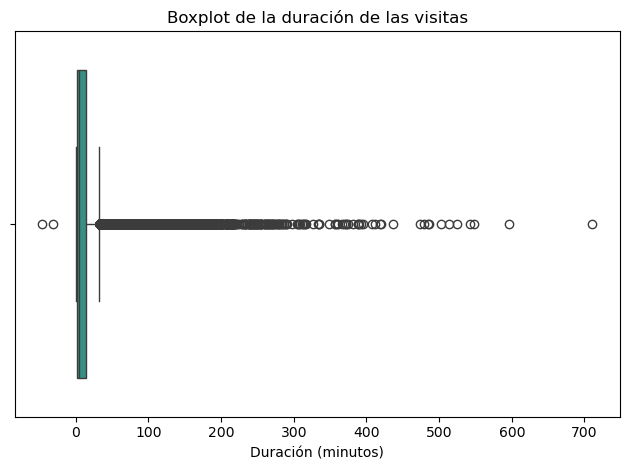

limite inferior: -16.0 minutos
limite superior: 32.0 minutos
% de visitas con duración típica: 93.14 %


In [339]:
# Reporte de duración de visitas
visits['Duración'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds() / 60  # Duración en minutos

# Filtrar valores atípicos
Q1 = visits['Duración'].quantile(0.25)
Q3 = visits['Duración'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
visits_tipic = visits[(visits['Duración'] >= limite_inferior) & (visits['Duración'] <= limite_superior)]

# Visualización de duración de visitas filtradas
sns.boxplot(data=visits, x='Duración', color='#2a9d8f')
plt.title('Boxplot de la duración de las visitas')
plt.xlabel('Duración (minutos)')
plt.tight_layout()
plt.show()

# resultados
print("limite inferior:", round(limite_inferior, 2), "minutos")
print("limite superior:", round(limite_superior, 2), "minutos")
print("% de visitas con duración típica:", round((visits_tipic.shape[0] / visits.shape[0]) * 100,2), "%")


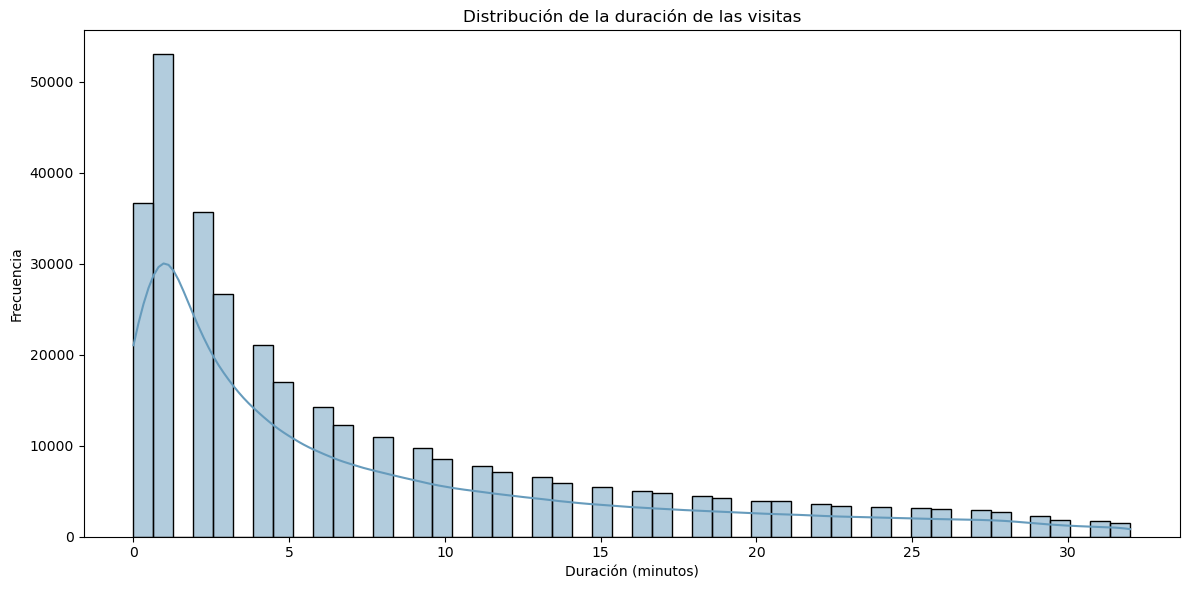

Duración media de las visitas: 7.42 minutos
Duración máxima de una visita: 32.0 minutos


In [340]:
# Visualización de duración de visitas
plt.figure(figsize=(12, 6))
sns.histplot(visits_tipic['Duración'], bins= 50, kde=True, color='#669bbc')
plt.title('Distribución de la duración de las visitas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

#Resultados de duración de visitas
mean_duration = visits_tipic['Duración'].mean()
print("Duración media de las visitas:", round(mean_duration, 2), "minutos")
max_duration = visits_tipic['Duración'].max()
print("Duración máxima de una visita:", round(max_duration, 2), "minutos")


Número de usuarios que regresan: 52128
% de usuarios que regresan: 18.6 %


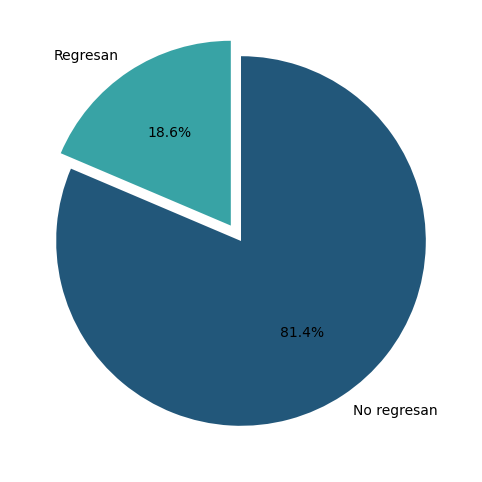

In [341]:
#Reporte de regreso de los usuarios
visits['Regreso'] = visits['Uid'].duplicated(keep='last').astype(int)
regresan = visits[visits['Regreso'] == 1]['Uid'].nunique()
no_regresan = visits[visits['Regreso'] == 0]['Uid'].nunique()
total_usuarios = regresan + no_regresan
porcentaje_regresan = (regresan / total_usuarios) * 100
porcentaje_no_regresan = (no_regresan / total_usuarios) * 100
# Visualización de regreso de los usuarios
plt.figure(figsize=(12, 6))
plt.pie([regresan, no_regresan], 
        labels=['Regresan', 'No regresan'], 
        autopct='%1.1f%%', 
        colors=['#38a3a5', '#22577a'], 
        startangle=90, 
        explode=(0.1, 0))
#resultados
print("Número de usuarios que regresan:", regresan)
print("% de usuarios que regresan:", round(porcentaje_regresan, 2), "%")

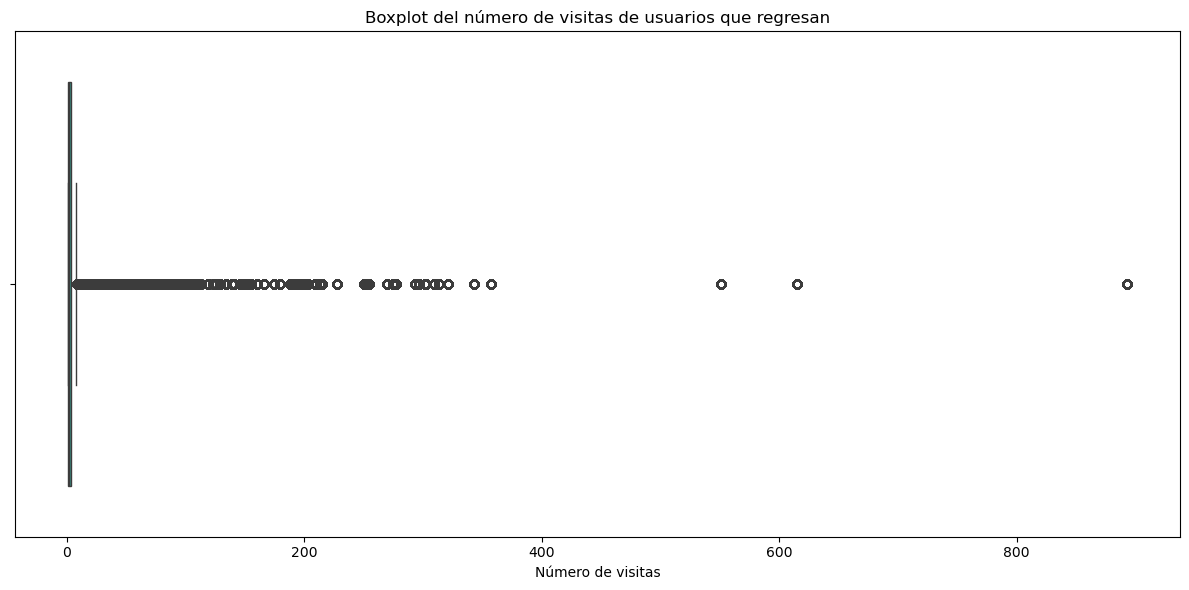

Límite inferior de visitas típicas: -13.5
Límite superior de visitas típicas: 30.5
Porcentaje de usuarios que regresan con visitas típicas: 81.7 %


In [342]:
# Join valores de regreso y tipic
visits['Numero de visitas'] = visits.groupby('Uid')['Uid'].transform('count')
Regreso = visits[visits['Regreso'] == 1]
Q1_ = Regreso['Numero de visitas'].quantile(0.25)
Q3_ = Regreso['Numero de visitas'].quantile(0.75)
IQR_ = Q3_ - Q1_
limite_inferior_ = Q1_ - 1.5 * IQR_
limite_superior_ = Q3_ + 1.5 * IQR_

Regreso_tipic = Regreso[(Regreso['Numero de visitas'] >= limite_inferior_) & (Regreso['Numero de visitas'] <= limite_superior_)]

# Visualización de regreso tipico de usuarios
plt.figure(figsize=(12, 6))
sns.boxplot(data=visits, x='Numero de visitas', color='#2a9d8f')
plt.title('Boxplot del número de visitas de usuarios que regresan')
plt.xlabel('Número de visitas')
plt.tight_layout()
plt.show()

#Resultados
print("Límite inferior de visitas típicas:", round(limite_inferior_, 2))
print("Límite superior de visitas típicas:", round(limite_superior_, 2))
print("Porcentaje de usuarios que regresan con visitas típicas:", round((Regreso_tipic.shape[0] / Regreso.shape[0]) * 100, 2), "%")

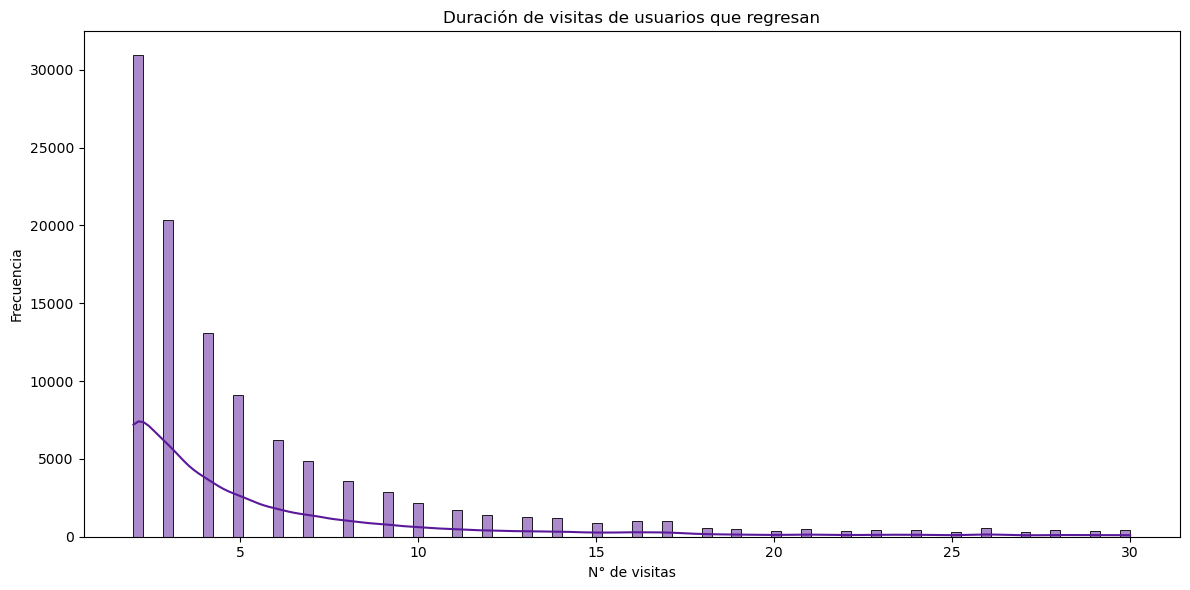

Duración media de visitas de usuarios que regresan: 5.74 veces
Duración máxima de una visita de usuarios que regresan: 30 veces


In [363]:
#Histograma de usuarios que regresan
plt.figure(figsize=(12, 6))
sns.histplot(Regreso_tipic['Numero de visitas'], bins=100, kde=True, color='#5a189a')
plt.title('Duración de visitas de usuarios que regresan')
plt.xlabel('N° de visitas')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

#Resultados de usuarios que regresan
mean_duration_regreso = Regreso_tipic['Numero de visitas'].mean()
print("Duración media de visitas de usuarios que regresan:", round(mean_duration_regreso, 2), "veces")
max_duration_regreso = Regreso_tipic['Numero de visitas'].max()
print("Duración máxima de una visita de usuarios que regresan:", round(max_duration_regreso, 2), "veces")

## Ventas
¿Cuándo empieza la gente a comprar?<br>
¿Cuántos pedidos hacen durante un período de tiempo dado?<br>
¿Cuál es el tamaño promedio de compra?<br>
¿Cuánto dinero traen? (LTV)

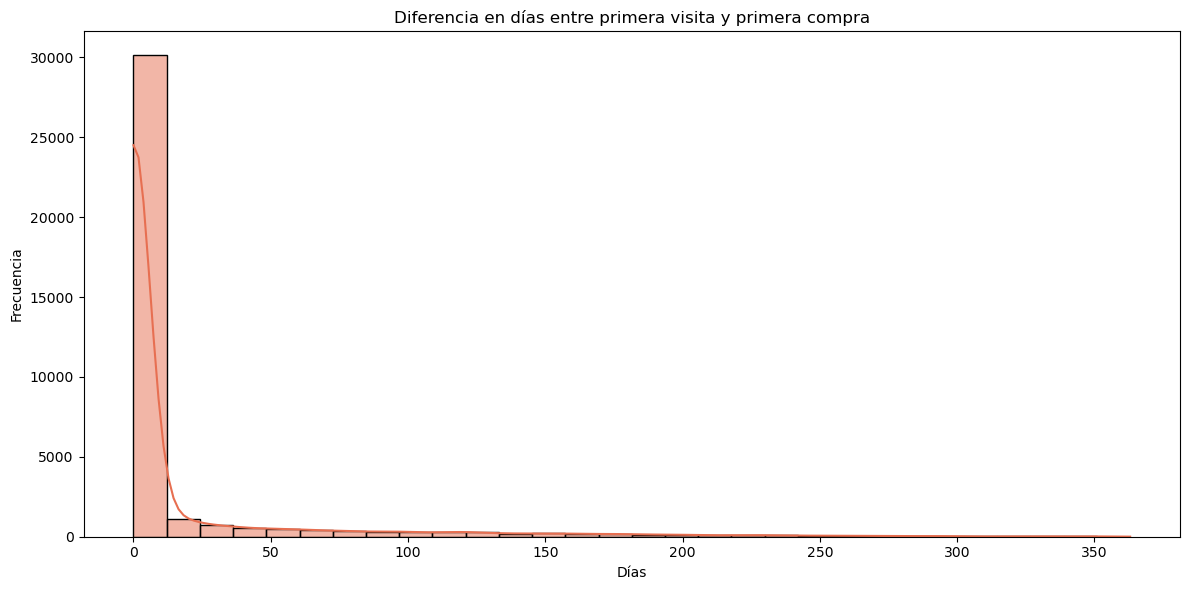

Promedio de días: 16.7298688497659


In [344]:
primera_visita = visits.groupby('Uid')['Start Ts'].min().reset_index()
Primera_compra = orders.groupby('Uid')['Buy Ts'].min().reset_index()
Primera_compra.rename(columns={'Buy Ts': 'First_order'}, inplace=True)
usuarios = pd.merge(
    primera_visita,
    Primera_compra,
    on='Uid',
    how='inner'
)

# Calcular la diferencia en días
usuarios['dias_primera_visita_a_compra'] = (usuarios['First_order'] - usuarios['Start Ts']).dt.days

# Visualización de la diferencia en días
plt.figure(figsize=(12, 6))
sns.histplot(usuarios['dias_primera_visita_a_compra'], bins=30, kde=True, color='#e76f51')
plt.title('Diferencia en días entre primera visita y primera compra')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

print("Promedio de días:", usuarios['dias_primera_visita_a_compra'].mean())

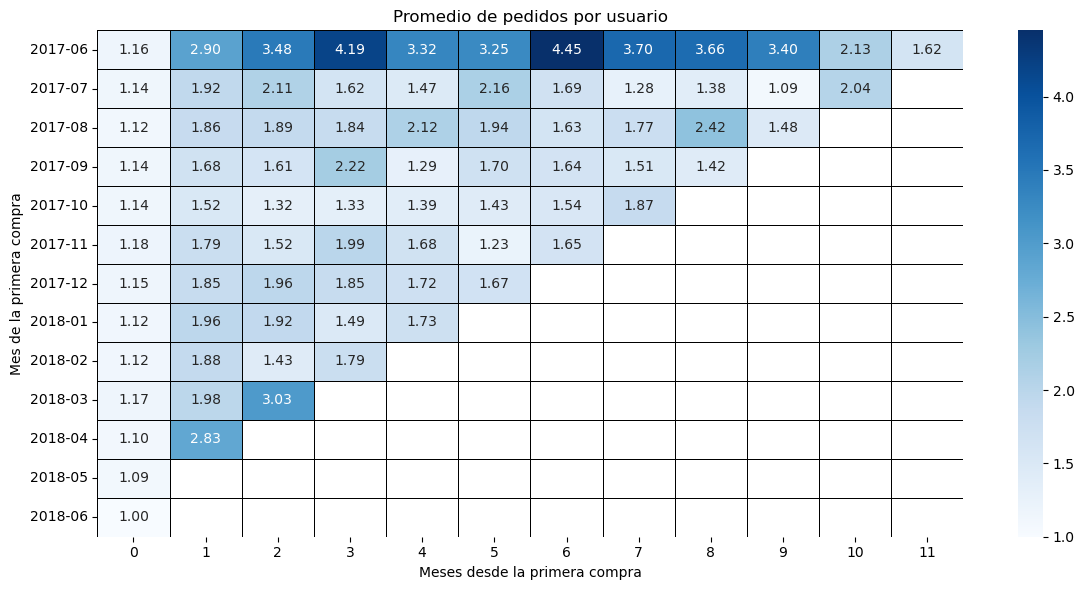

In [345]:
orders = orders.merge(Primera_compra, on='Uid', how='left')
orders['order_month'] = orders['Buy Ts'].dt.to_period('M')
orders['First_order_month'] = orders['First_order'].dt.to_period('M')
Orders_grouped_by_cohorts = orders.groupby(
    ['First_order_month', 'order_month']
).agg(
    {'Uid': 'nunique', 'Buy Ts': 'count'}
)
Orders_grouped_by_cohorts['Orders_per_user'] = Orders_grouped_by_cohorts['Buy Ts'] / Orders_grouped_by_cohorts['Uid']
Orders_grouped_by_cohorts = Orders_grouped_by_cohorts.reset_index()

Orders_grouped_by_cohorts['cohort_lifetime'] = (
    Orders_grouped_by_cohorts['order_month'] - Orders_grouped_by_cohorts['First_order_month']
).apply(attrgetter('n'))
Orders_grouped_by_cohorts['cohort_lifetime'] = Orders_grouped_by_cohorts['cohort_lifetime'].round().astype(int)
Lifetime_pivot = Orders_grouped_by_cohorts.pivot_table(
    index='First_order_month',
    columns='cohort_lifetime',
    values='Orders_per_user',
    aggfunc='mean'
)

# Visualización de la tabla de cohortes
plt.figure(figsize=(12, 6))
sns.heatmap(
    Lifetime_pivot,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    linewidths=0.5,
    linecolor='black'
)
plt.title('Promedio de pedidos por usuario')
plt.xlabel('Meses desde la primera compra')
plt.ylabel('Mes de la primera compra')
plt.tight_layout()
plt.show()

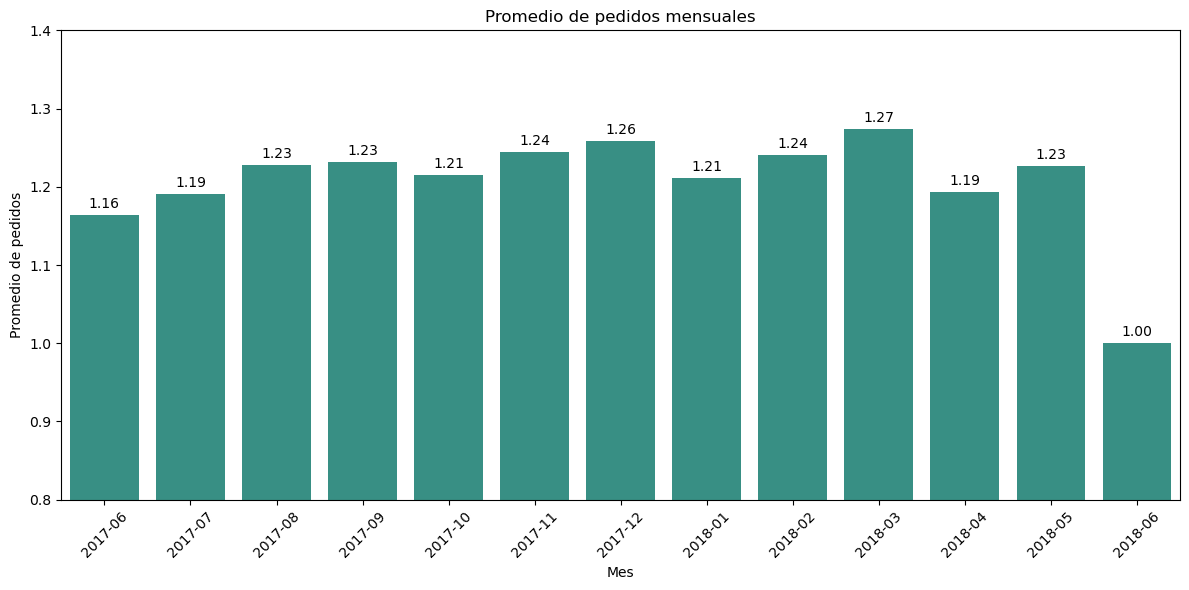

Promedio general de pedidos por usuario: 1.14


In [346]:
#Reporte promedio de pedidos
monthly_orders =  orders.groupby([orders['Buy Ts'].dt.to_period('M'), 'Uid']).size().reset_index(name='order_count')
mean_orders_monthly = monthly_orders.groupby('Buy Ts')['order_count'].mean().reset_index()
mean_orders_general = monthly_orders.groupby('Uid')['order_count'].mean().reset_index()
# Visualización de promedio de pedidos mensuales
plt.figure(figsize=(12, 6))
bars_ = sns.barplot(
    x=mean_orders_monthly['Buy Ts'].astype(str),
    y=mean_orders_monthly['order_count'],
    color='#2a9d8f',
)
for container in bars_.containers:
    bars_.bar_label(container, fmt='%.2f', padding=3)
plt.title('Promedio de pedidos mensuales')
plt.ylim(0.8, 1.4)
plt.xlabel('Mes')
plt.ylabel('Promedio de pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Promedio general de pedidos por usuario: {mean_orders_general['order_count'].mean():.2f}")

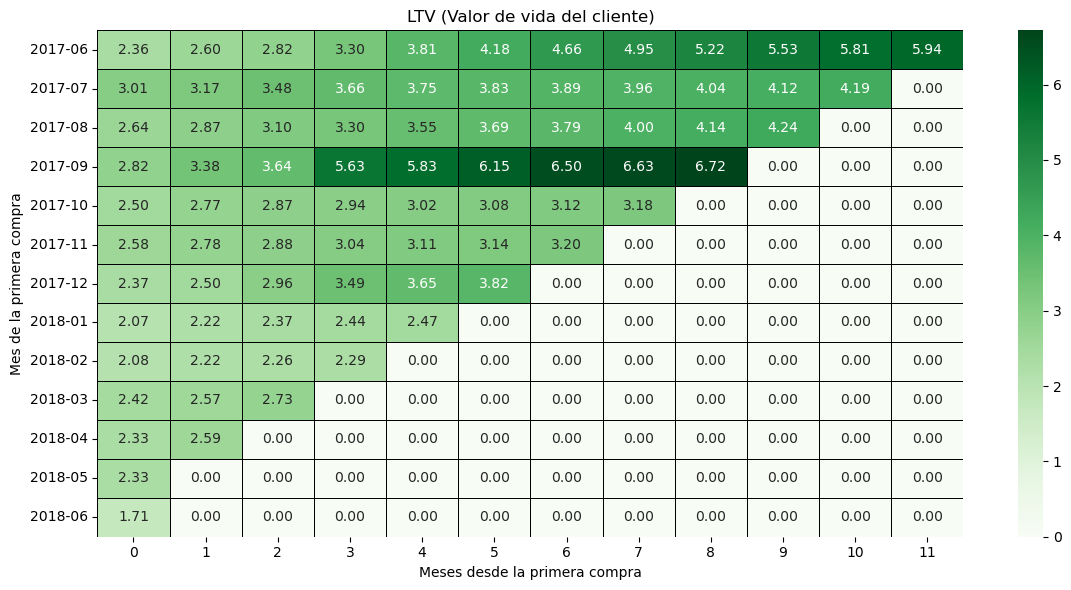

In [347]:
#Reporte de ganancias (LTV)
cohort_sizes = orders.groupby('First_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['First_order_month', 'n_buyers']

margin_rate = 0.5

orders_ = pd.merge(orders, Primera_compra, on='Uid', how='left')
cohorts = (orders_.groupby(['First_order_month','order_month'])
           .agg({'Revenue':'sum'})
           .reset_index())

report = pd.merge(cohort_sizes, cohorts, on='First_order_month')
report['gp'] = report['Revenue'] * margin_rate
report['gp_cum'] = report.groupby('First_order_month')['gp'].cumsum()
report['months_since_first_purchase'] = (report['order_month'] - report['First_order_month']).apply(attrgetter('n'))
report['months_since_first_purchase'] = report['months_since_first_purchase'].round().astype(int)
report['ltv'] = report['gp_cum'] / report['n_buyers']

result = report.pivot_table(
    index='First_order_month',
    columns='months_since_first_purchase',
    values='ltv',
    aggfunc='mean'
).round(2)
result = result.fillna(0)

# Visualización de LTV
plt.figure(figsize=(12, 6))
sns.heatmap(
    result,
    annot=True,
    fmt='.2f',
    cmap='Greens',
    linewidths=0.5,
    linecolor='black'
)
plt.title('LTV (Valor de vida del cliente)')
plt.xlabel('Meses desde la primera compra')
plt.ylabel('Mes de la primera compra')
plt.tight_layout()
plt.show()

## Marketing:
 ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)<br>
 ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?<br>
 ¿Cuán rentables eran las inversiones? (ROMI)

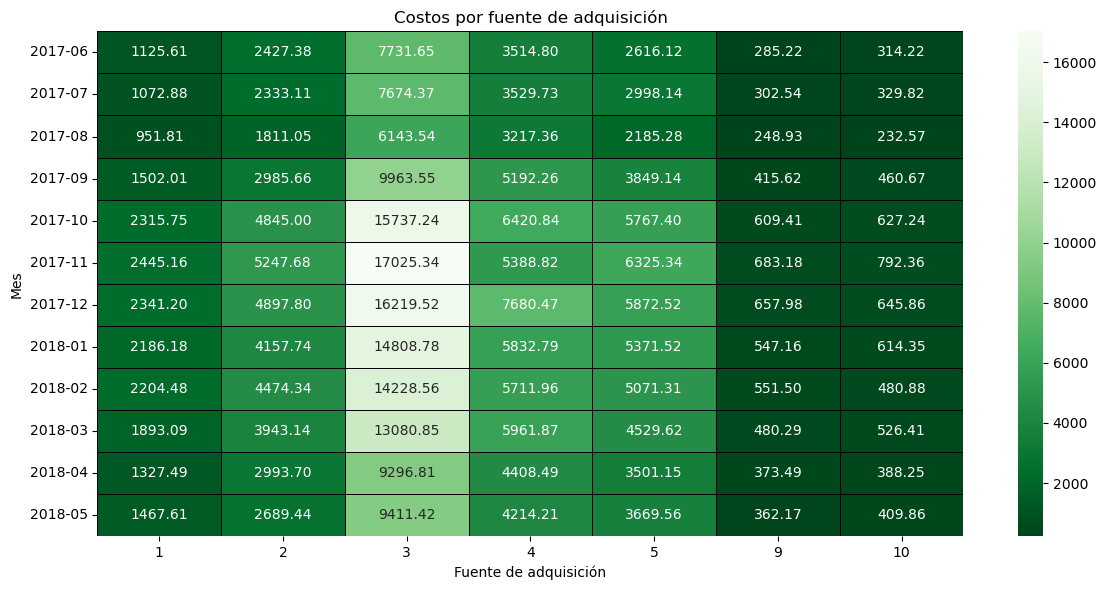

In [348]:
costs['month'] = costs['dt'].dt.to_period('M')
#Reporte de costos
costs_per_source = costs.groupby(['month', 'source_id'])['costs'].sum().reset_index()
costs_pivot = costs_per_source.pivot_table(
    index='month',
    columns='source_id',
    values='costs',
    aggfunc='sum'
)
# Visualización de costos por fuente
plt.figure(figsize=(12, 6))
sns.heatmap(
    costs_pivot,
    annot=True,
    fmt='.2f',
    cmap='Greens_r',
    linewidths=0.5,
    linecolor='black'
)
plt.title('Costos por fuente de adquisición')
plt.xlabel('Fuente de adquisición')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

<Axes: xlabel='source_id', ylabel='month'>

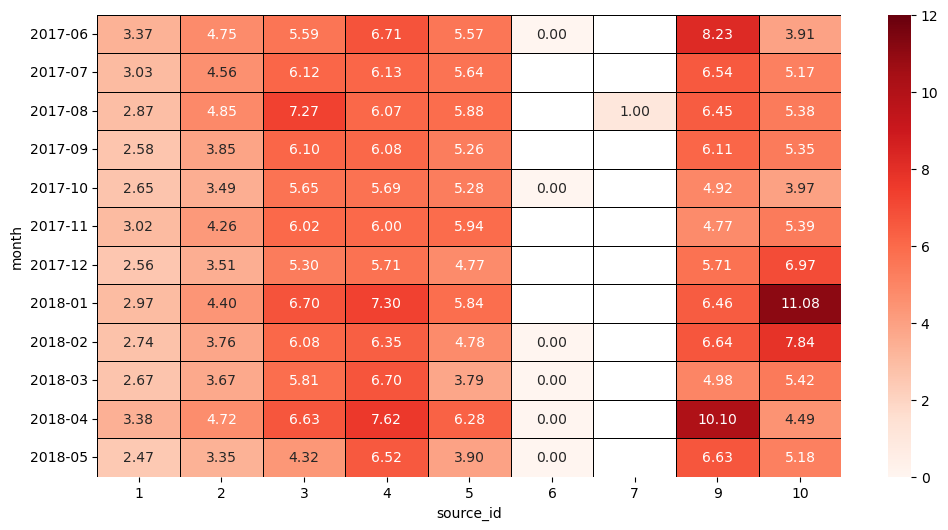

In [362]:
visits_monthly = visits.groupby([visits['Start Ts'].dt.to_period('M'),'Uid','Source Id']).size().reset_index(name='visits_count')
Sells = visits_monthly.merge(monthly_orders, left_on=['Start Ts', 'Uid'], right_on=['Buy Ts', 'Uid'], how='left')
Sells = Sells.groupby(['Start Ts', 'Source Id'])[['visits_count','order_count']].sum().reset_index()
Sells.rename(columns={'Start Ts': 'month','Source Id': 'source_id'}, inplace=True)
costs_per_source.merge(
    Sells,
    on=['month', 'source_id'],
    how='left'
).fillna(0)

Sells['CAC'] = Sells['visits_count'] / Sells['order_count']
pivot_sells = Sells.pivot_table(
    index='month',
    columns='source_id',
    values='CAC',
    aggfunc='mean'
).fillna(0)

# Visualización de CAC por fuente
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_sells,
    annot=True,
    fmt='.2f',
    cmap='Reds',
    vmin=0,
    vmax=12,
    linewidths=0.5,
    linecolor='black'
)

In [ ]:
#Rentabilidad de las inversiones (ROMI)
df_romi = pd.merge(report, Sells, left_on=[''],right_on=[''] )